In [1]:
import sys
sys.path.append('../')

import numpy as np
import os
import matplotlib.pyplot as plt
from IPython.display import clear_output
import pandas as pd
import seaborn as sns
from models.SSA import SSA
from models.LRF import LRF

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

plt.style.use('seaborn-v0_8-whitegrid')

PATH = os.path.join(os.path.dirname(os.getcwd()), 'data\data')

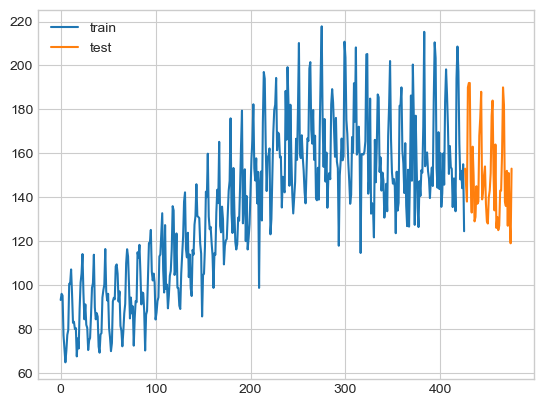

In [2]:
ts = pd.read_csv(os.path.join(PATH, 'beer_production.csv'))['Monthly beer production'].to_numpy()

M = 50
ts_train, ts_test = ts[:-M], ts[-M:]
sns.lineplot(x = np.arange(len(ts_train)), y = ts_train, label = 'train')
sns.lineplot(x = np.arange(len(ts_train), len(ts)), y = ts_test, label = 'test')
plt.legend();

MSE: 134.61923086466876
MAPE: 0.06326091310991318
R^2: 0.6677449898248018


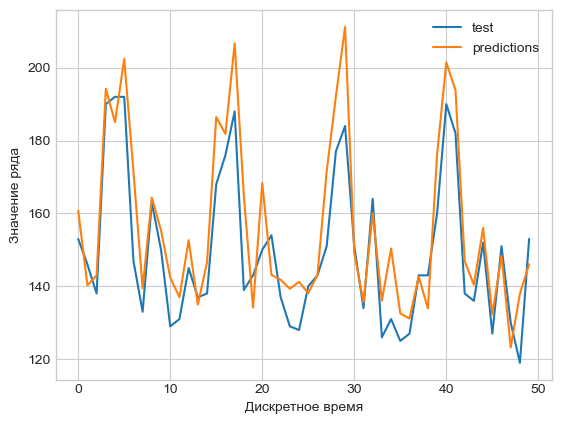

In [3]:
# SSA predictions

ssa = SSA(l = 7*12, rank = 20).fit(ts_train)
predictions = ssa.predict(horizon = M)

sns.lineplot(x = np.arange(len(ts_test)), y = ts_test, label = 'test')
sns.lineplot(x = np.arange(len(ts_test)), y = predictions, label = 'predictions')
print('MSE:', mean_squared_error(ts_test, predictions))
print('MAPE:', mean_absolute_percentage_error(ts_test, predictions))
print('R^2:', r2_score(ts_test, predictions))
plt.ylabel('Значение ряда')
plt.xlabel('Дискретное время')
plt.savefig('SSA_simple_predictions.png', dpi = 300)
plt.legend();

MSE: 324.59368283384805
MAPE: 0.10485760113091035
R^2: 0.19886722944373725


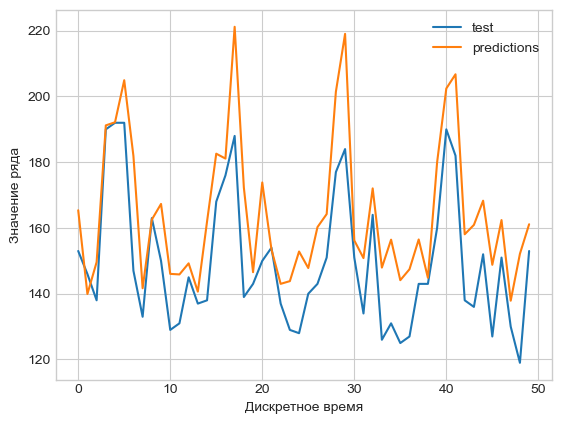

In [23]:
# Linear model

lrf = LRF(dim = 7*12)
lrf.fit(ts_train)

predictions = lrf.predict(ts_train, M = M)

sns.lineplot(x = np.arange(len(ts_test)), y = ts_test, label = 'test')
sns.lineplot(x = np.arange(len(ts_test)), y = predictions, label = 'predictions')
print('MSE:', mean_squared_error(ts_test, predictions))
print('MAPE:', mean_absolute_percentage_error(ts_test, predictions))
print('R^2:', r2_score(ts_test, predictions))
plt.ylabel('Значение ряда')
plt.xlabel('Дискретное время')
plt.legend()
plt.savefig('lrf_simple_predictions.png', dpi = 300);